<a href="https://colab.research.google.com/github/Dhruvin3103/sem6/blob/master/ml/Copy_of_SUV_prediction(Log_reg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SUV Prediction

In [ ]:
import matplotlib as plt
import numpy as np
import seaborn as sns
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Dhruvin3103/ML/main/CSV/suv_data.csv")
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
392,15748589,Female,45,45000,1
393,15635893,Male,60,42000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
# X = df[['Age','EstimatedSalary']]
# Y = df['Purchased']
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X_train,Y_train)
# pred = model.predict(X_test)
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# print(confusion_matrix(Y_test,pred))
# print(accuracy_score(Y_test,pred)*100)

<Axes: xlabel='Gender', ylabel='count'>

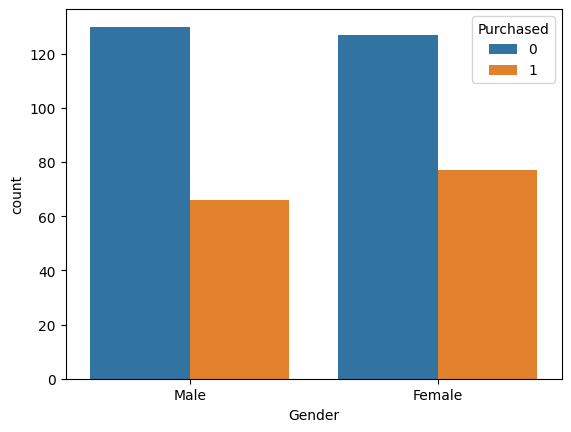

In [ ]:
sns.countplot(x="Gender",hue="Purchased",data=df)

<Axes: ylabel='Frequency'>

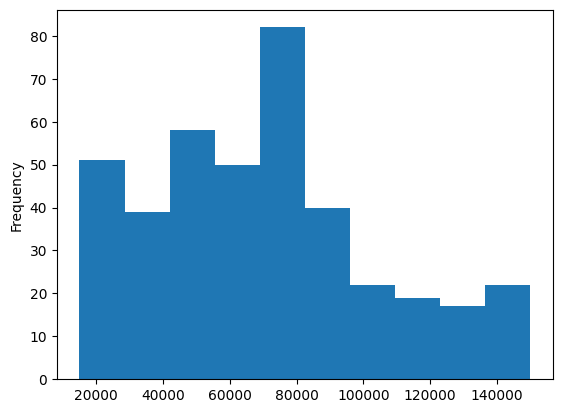

In [ ]:
df["EstimatedSalary"].plot.hist()

In [ ]:
df2 = df.copy()
bins = [0, 40000, 80000, 100000, 140000]
labels =["Low Salary", "Medium Salary", "High Salary", "very high sal"]
df2['SalaryCategory'] = pd.cut(df2['EstimatedSalary'], bins, labels=labels)
df2.head()
sal = pd.get_dummies(df2['SalaryCategory'])
df = pd.concat([df,df2['SalaryCategory'],sal],axis=1)

In [ ]:
# df["Age"].plot.hist()

In [ ]:
df3= df.copy()
bin = [0,20,30,40,50,60]
label = ['less 20','20-30','30-40','40-50','50-60']
df3["age_cat"] = pd.cut(df3["Age"],bins=bin, labels = label)
age_cat = pd.get_dummies(df3["age_cat"])
df = pd.concat([df,age_cat,df3["age_cat"]],axis=1)


In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,SalaryCategory,Low Salary,Medium Salary,High Salary,very high sal,less 20,20-30,30-40,40-50,50-60,age_cat
0,15624510,Male,19,19000,0,Low Salary,1,0,0,0,1,0,0,0,0,less 20
1,15810944,Male,35,20000,0,Low Salary,1,0,0,0,0,0,1,0,0,30-40
2,15668575,Female,26,43000,0,Medium Salary,0,1,0,0,0,1,0,0,0,20-30
3,15603246,Female,27,57000,0,Medium Salary,0,1,0,0,0,1,0,0,0,20-30
4,15804002,Male,19,76000,0,Medium Salary,0,1,0,0,1,0,0,0,0,less 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,Medium Salary,0,1,0,0,0,0,0,1,0,40-50
396,15706071,Male,51,23000,1,Low Salary,1,0,0,0,0,0,0,0,1,50-60
397,15654296,Female,50,20000,1,Low Salary,1,0,0,0,0,0,0,1,0,40-50
398,15755018,Male,36,33000,0,Low Salary,1,0,0,0,0,0,1,0,0,30-40


# seprating dependent(gender, age, salary) and independent variables(purchase)**bold text**

first separating gender with values 0 and 1 where 1 means men and vice versa so for this i used get_dummies from pandas lib

In [ ]:
gen = pd.get_dummies(df["Gender"],drop_first=True)
x1 = df.iloc[:,[6,7,8,9,10,11,12,13,14]]
X = pd.concat([x1,gen],axis=1)
Y = df['Purchased']
X

,Low Salary,Medium Salary,High Salary,very high sal,less 20,20-30,30-40,40-50,50-60,Male
0,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
395,0,1,0,0,0,0,0,1,0,0
396,1,0,0,0,0,0,0,0,1,1
397,1,0,0,0,0,0,0,1,0,0
398,1,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

making df for x and y

implementation  of Logistic Regression**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, weights):
    m = len(y)
    y_hat = sigmoid(X.dot(weights))
    error = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    return 1 / m * np.sum(error)

def gd(X, y, weights, lr, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        y_hat = sigmoid(X.dot(weights))
        error = y_hat - y
        gradient = 1 / m * X.T.dot(error)
        weights -= lr * gradient
    return weights

def predict(X, weights):
    z = X.dot(weights)
    y_hat = sigmoid(z)
    return np.where(y_hat >= 0.5, 1, 0)


weights = np.zeros(X.shape[1])
weights = gd(X_train, Y_train, weights, lr=0.1, num_iterations=1000)
new_data = X_test

predictions = predict(new_data, weights)
print(predictions)
cf = cost_function(X,Y,weights)
print(cf)

[1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 0 0]
0.33833843387370466


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions)*100)

[[69  4]
 [10 37]]
88.33333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred)*100)

[[69  4]
 [ 9 38]]
89.16666666666667


checking the accuracy using sklearn libs

[[69  4]
 [10 37]]
88.33333333333333
